In [1]:
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Periapan data
## Ambil data Gold Price Archive 2010-2023 Dataset
nama file  = XAUUSD_2010-2023.csv
sumber file = https://www.kaggle.com/datasets/ahmadkarrabi/gold-price-archive-2010-2023-dataset
data yang di perlukan
1. time = Stempel waktu dari harga yang tercatat
2. open = Harga pembukaan
3. high = Harga Tinggi
4. low = Harga Rendah
5. rsi14 = Indeks Kekuatan Relatif (RSI) dihitung selama periode 14 hari
6. sma14 = Simple Moving Average (SMA) dihitung selama periode 14 hari



In [3]:
# ambil data  
file_csv = '../../data/XAUUSD_2010-2023.csv'
# ambil data yang di perlukan
# data time tidak di perlukan karena dia ber type date atau waktu
# karena data yang sedang di olah adalah angka atau numerik

df = pd.read_csv(
    file_csv,
    usecols=[  #'time',
        'open', 'high', 'low', 'rsi14', 'sma14'
    ])


In [13]:
#  kita ambil data sembanyak 100 ribu
df = df.head(100_000)
# check data
df

,open,high,low,rsi14,sma14
0,1098,1100.00,1098.05,81.98,1096.38
1,1100,1100.30,1099.45,79.17,1096.72
2,1099,1100.10,1099.30,75.02,1097.03
3,1099,1099.60,1098.50,75.02,1097.30
4,1099,1099.60,1098.90,67.50,1097.50
...,...,...,...,...,...
99995,1514,1514.83,1513.88,44.35,1514.50
99996,1514,1515.53,1514.58,51.24,1514.50
99997,1515,1515.88,1515.13,53.71,1514.51
99998,1515,1516.78,1515.38,65.12,1514.62


In [7]:
df.shape

(100000, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    100000 non-null  float64
 1   high    100000 non-null  float64
 2   low     100000 non-null  float64
 3   rsi14   100000 non-null  float64
 4   sma14   100000 non-null  float64
dtypes: float64(5)
memory usage: 3.8 MB


In [14]:
 # diskripsikan data
#  untuk melihat beberapa nilai nilai statistic
df.describe()

,open,high,low,rsi14,sma14
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1281.720300,1282.679546,1281.746151,50.929789,1282.191062
std,126.523648,126.553800,126.493120,11.197596,126.514056
min,1048.000000,1050.450000,1044.180000,7.080000,1050.850000
25%,1176.000000,1177.080000,1176.117500,43.660000,1176.775000
50%,1256.000000,1257.300000,1256.580000,51.040000,1256.950000
75%,1385.000000,1385.780000,1384.930000,58.370000,1385.350000
max,1574.000000,1576.300000,1573.700000,91.980000,1568.560000


In [10]:
df['open'] = df['open'].astype('int')

In [8]:
df['open'] = df['open'].replace(33, 3)

In [9]:
# Filter data apabila ada yang NULL maka akan di lihatkan 
df.isnull().sum()

open     0
high     0
low      0
rsi14    0
sma14    0
dtype: int64

In [10]:
df.head()

,open,high,low,rsi14,sma14
0,1098,1100.0,1098.05,81.98,1096.38
1,1100,1100.3,1099.45,79.17,1096.72
2,1099,1100.1,1099.30,75.02,1097.03
3,1099,1099.6,1098.50,75.02,1097.30
4,1099,1099.6,1098.90,67.50,1097.50


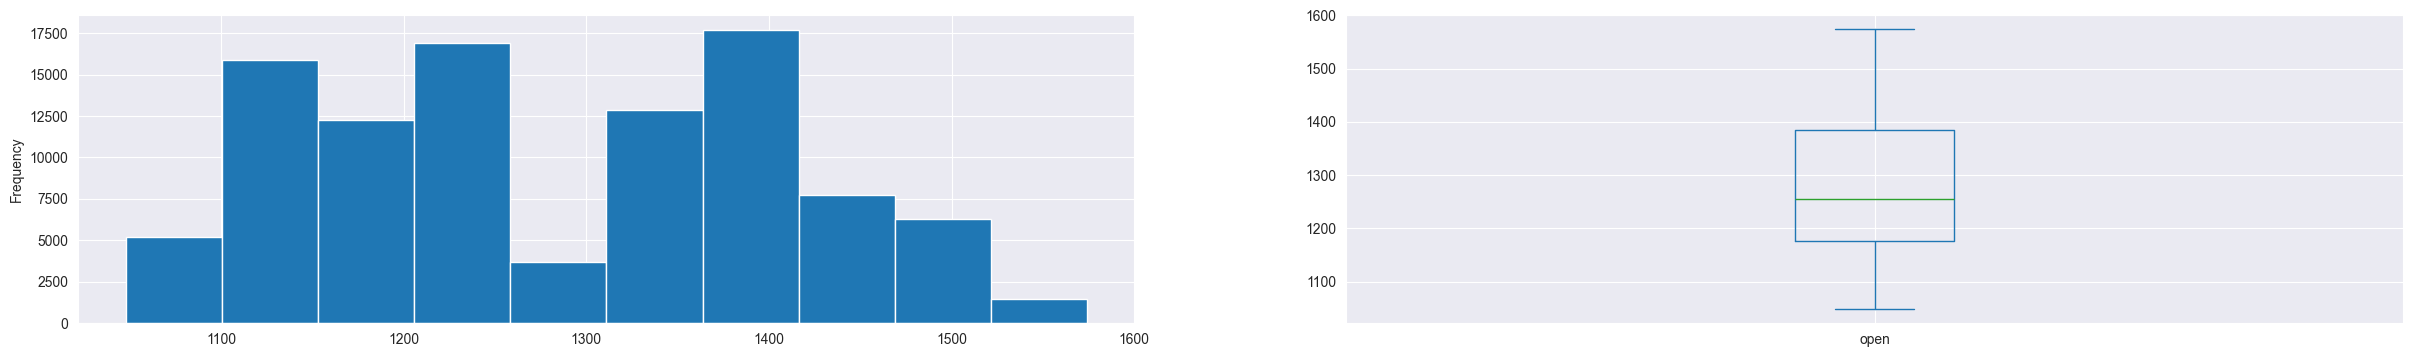

In [20]:
# buatlah instant sebuah grafik
f = plt.figure(
    figsize=(
        30,  # panjang
        4  # tinggi
    ))

f.add_subplot(1, 2, 1)
# buat dalam bentuk bar kotak
df['open'].plot.hist()

f.add_subplot(1, 2, 2)
# buat dalam bentuk box 
df['open'].plot.box()
plt.show()

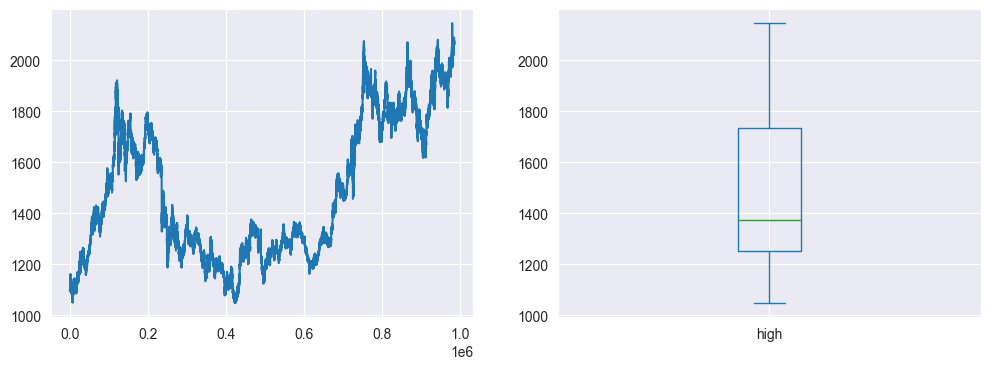

In [13]:
# buatlah sebuah grafik
f = plt.figure(
    figsize=(
        12,  #panjang
        4  # lebar
    ))

f.add_subplot(1, 2, 1)
df['high'].plot.line()

f.add_subplot(1, 2, 2)
df['high'].plot.box()
plt.show()

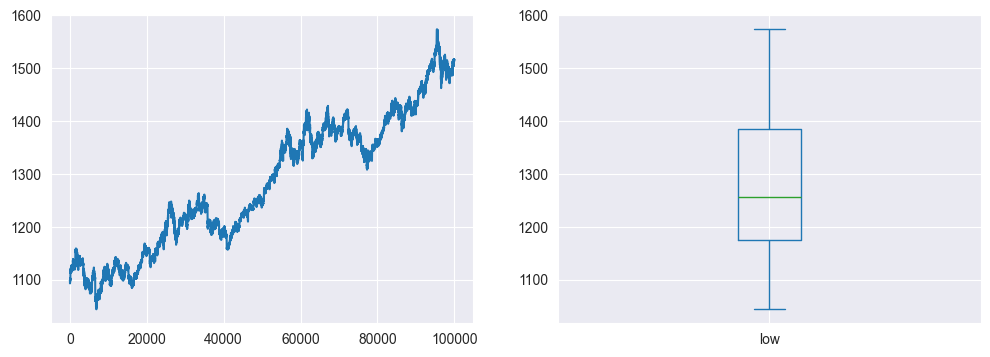

In [17]:
f = plt.figure(figsize=(12, 4))
f.add_subplot(1, 2, 1)
df['low'].plot.line()

f.add_subplot(1, 2, 2)
df['low'].plot.box()
plt.show()

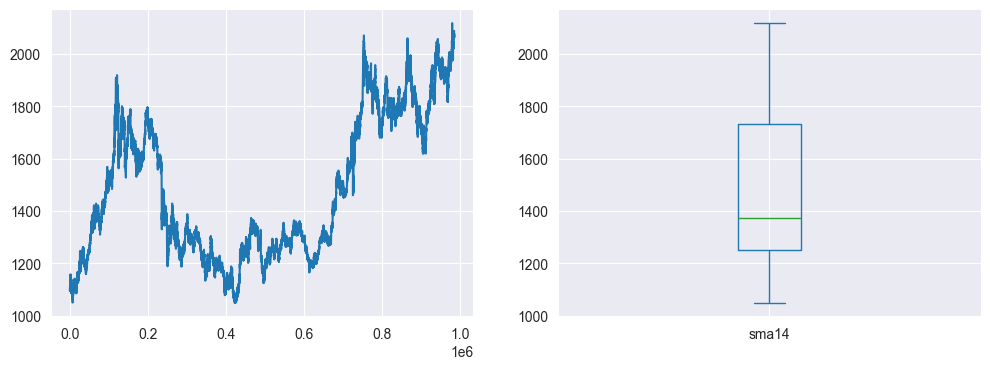

In [18]:
f = plt.figure(figsize=(12, 4))
f.add_subplot(1, 2, 1)
df['sma14'].plot.line()

f.add_subplot(1, 2, 2)
df['sma14'].plot.box()
plt.show()

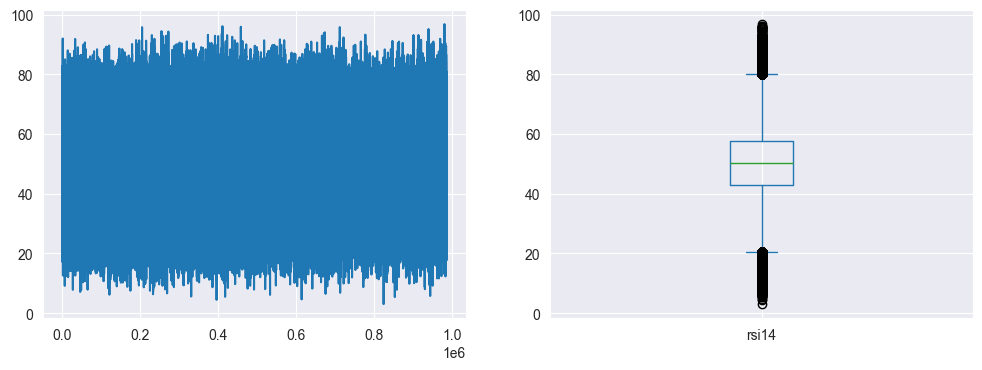

In [19]:
f = plt.figure(figsize=(12, 4))
f.add_subplot(1, 2, 1)
df['rsi14'].plot.line()

f.add_subplot(1, 2, 2)
df['rsi14'].plot.box()
plt.show()

<Figure size 1000x800 with 0 Axes>

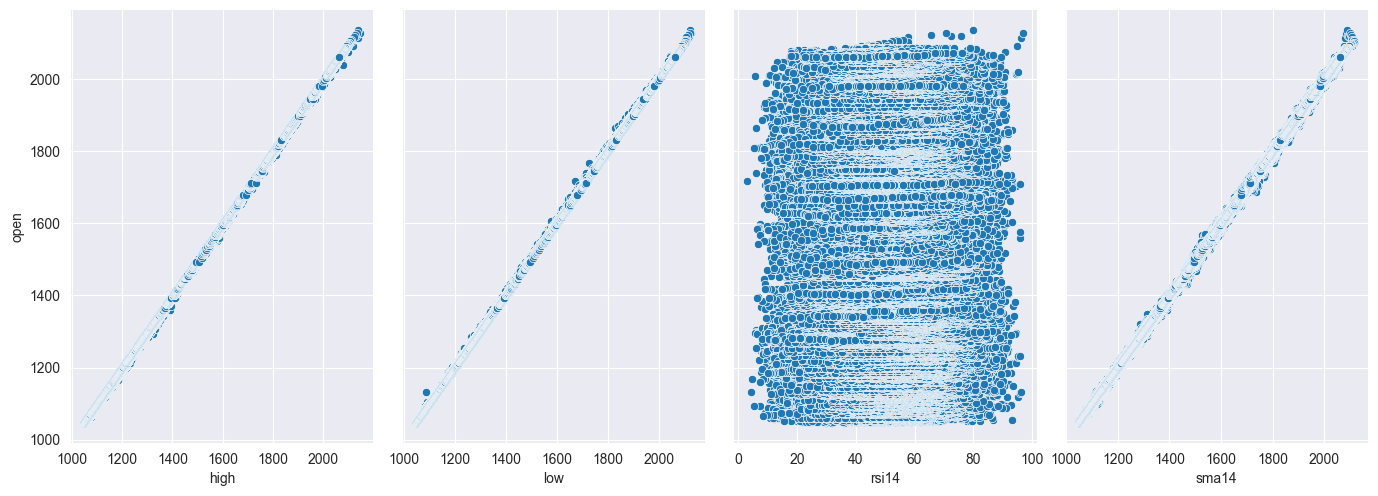

In [22]:
plt.figure(figsize=(10, 8))
sns.pairplot(data=df,
             x_vars=['high', 'low', 'rsi14', 'sma14'],
             y_vars=['open', ],
             height=5, aspect=0.7)
plt.show()

In [27]:
df.corr().style.background_gradient().format(precision=2)  #.set_precision(2)

,open,high,low,rsi14,sma14
open,1.00,1.00,1.00,0.01,1.00
high,1.00,1.00,1.00,0.01,1.00
low,1.00,1.00,1.00,0.01,1.00
rsi14,0.01,0.01,0.01,1.00,0.01
sma14,1.00,1.00,1.00,0.01,1.00


In [28]:
df.head()

,open,high,low,rsi14,sma14
0,1098,1100.0,1098.05,81.98,1096.38
1,1100,1100.3,1099.45,79.17,1096.72
2,1099,1100.1,1099.30,75.02,1097.03
3,1099,1099.6,1098.50,75.02,1097.30
4,1099,1099.6,1098.90,67.50,1097.50


In [29]:
x = df.drop(columns='open')
y = df['open']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [50]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

           high      low  rsi14    sma14
704560  1470.26  1468.54  39.84  1470.08
106086  1547.20  1546.65  36.86  1547.16
409570  1153.60  1153.31  51.04  1153.72
59141   1326.88  1325.08  39.00  1328.07
416004  1166.54  1166.34  51.44  1166.19
...         ...      ...    ...      ...
929367  1930.91  1930.05  54.04  1930.94
653672  1286.24  1285.96  39.28  1286.31
120705  1896.85  1895.15  56.41  1896.08
377541  1191.58  1190.81  27.44  1193.22
485815  1263.17  1262.88  49.51  1262.94

[788803 rows x 4 columns]
           high      low  rsi14    sma14
317428  1254.95  1254.28  69.16  1253.91
395657  1147.99  1147.72  64.04  1147.50
507390  1230.76  1230.24  49.88  1230.50
874805  1952.98  1951.90  67.59  1951.71
49353   1254.78  1253.53  30.05  1258.20
...         ...      ...    ...      ...
43112   1205.60  1205.30  56.05  1205.14
474323  1337.72  1336.99  50.26  1337.34
924500  1837.68  1837.33  47.15  1837.27
699839  1490.41  1490.01  47.47  1490.77
567646  1256.55  1256.12  54.7

In [55]:
lin_reg = LinearRegression()
lin_reg.fit(x_train.values, y_train)

LinearRegression()

In [56]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 0.49292889  0.45181285 -0.0087781   0.05525493]
-0.06856738126384698


In [57]:
coef_dict = {
    'low': x.columns,
    'coef_value': lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['low', 'coef_value'])
coef

,low,coef_value
0,high,0.492929
1,low,0.451813
2,rsi14,-0.008778
3,sma14,0.055255


In [59]:
y_pred = lin_reg.predict(x_test.values)
y_pred

array([1253.90997408, 1147.20639003, 1230.00016729, ..., 1837.01062729,
       1489.75893214, 1255.7909334 ])

In [61]:
lin_reg.score(x_test.values, y_test)

0.99999543836741

In [62]:
# open 1100
# high 1100
# low 1100
# rsi14 80
# sma14 1100

set_pred1 = [1100, 1100, 80, 1100]
set_pred2 = [1100, 1100, 70, 1100]

try_pred = np.array([set_pred1, set_pred2])

try_linear = lin_reg.predict(try_pred)
try_linear

array([1099.22551599, 1099.31329699])